In [2]:
%cd ..

/root/autobounds


In [3]:
from autobounds.causalProblem import causalProblem
from autobounds.DAG import DAG

import pandas as pd
import networkx as nx
import plotnine as pn
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def print_bounds(prog_optim):
    print("======================")
    (
    print(f"Causal effect lies in the interval [{np.round(prog_optim[0]['dual'], 3)}, "
      f"{np.round(prog_optim[1]['dual'], 3)}]")
    )

# Section 1: Data

## 1.1 Story

## 1.2 EDA 

In [5]:
dat = pd.read_csv("replication_files/data/measurement_error.csv")

# Section 2: Autobounds analysis

## 2.1 Draw the DAG, define the problem, load the data

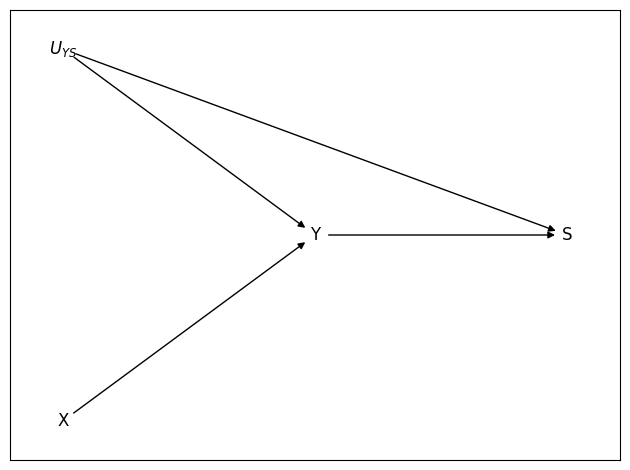

In [10]:
# Define DAG
dag = DAG()
dag.from_structure("X -> Y, Y -> S, Uys -> S, Uys -> Y", unob = "Uys")
dag.plot()

# Define causal Problem
problem = causalProblem(dag)

# Add data
problem.load_data(dat)

## 2.2 Additonal assumptions

In [7]:
# Add axioms of probability, and empirical evidence
problem.add_prob_constraints()
# add monotonicity constraint
problem.add_constraint(problem.query('S(Y=0)=1&S(Y=1)=0'))

## 2.3 Encode the estimand

In [8]:
problem.set_ate(ind="X", dep="Y")

## 2.4 Run the program

In [9]:
# Write program 
program = problem.write_program()
program_bounds = program.run_scip(filename = 'replication_files/results/measurement_error.csv')
print_bounds(program_bounds)

Problem is finished! Returning final values
Problem is finished! Returning final values
Causal effect lies in the interval [-0.62, 1.0]


# Discussion